# Figure 2 - Mouse, COMD coefficient analysis and GSEA

In [1]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.metrics import explained_variance_score
import pandas as pd
import numpy as np
from plotnine import *
from data_utils.sequence_utils import ALL_CODONS_NAMES
from scipy.stats import pearsonr, spearmanr

In [2]:
import rpy2
%load_ext rpy2.ipython

In [3]:
%%R
suppressPackageStartupMessages({
  library(data.table)
  library(ggplot2)
  library(ggthemes)
  library(ggrepel)
  library(ggpointdensity)
})


## Processing and loading data

In [4]:
data_path = '../../data/'

In [5]:
hl_df = pd.read_csv(data_path + 'mouse_pseudo_bulk_hl.csv', sep='\t').set_index('transcript_id')
hl_df

/opt/modules/i12g/anaconda/envs/mrna_halflife2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (84) have mixed types.Specify dtype option on import or set low_memory=False.


,Unnamed: 0,utr5,cds,utr3,AAA,AAC,AAG,AAT,ACA,ACC,...,hematopoietic precursor cell,precursor B cell,promonocyte,DN4 thymocyte,immature T cell,double negative T cell,thymocyte,bladder urothelial cell,bladder cell,fibroblast of cardiac tissue
transcript_id,,,,,,,,,,,,,,,,,,,,,
ENSMUST00000070533.4,0,GCGGCGGCGGGCGAGCGGGCGCTGGAGTAGGAGCTGGGGAGCGGCG...,ATGGCCGCTAAGTCAGACGGGAGGCTGAAGATGAAGAAGAGCAGCG...,TAAAATACAAGGAGCCGCAATGTCCACATGAAGGGGTAACAGCAGG...,0.009274,0.012365,0.018547,0.007728,0.013910,0.020093,...,-0.326460,-0.527437,-0.680285,-0.917239,-1.010992,-0.958222,-1.106510,-1.178948,-1.128194,-1.236056
ENSMUST00000027035.9,1,CCCATTTAGTGAAGAAACTGAAATATGGCCCACTCACACTGCTGGC...,ATGAGCAGCCCGGATGCGGGATACGCCAGTGACGACCAGAGCCAGC...,TGACGGTTGCCGACCCGACCTGAGGGCCAGAAGCAGTGTTACACAC...,0.007160,0.016706,0.026253,0.000000,0.002387,0.004773,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.604054
ENSMUST00000156816.6,2,GGAGCCGTAAAGCAACGCGGAGTCTACGCCGCTTCCTGGGCGCCCT...,ATGGCTGGCACGGCGCGCGGCTGCGGGACCAGCCTGGACCTGCTGC...,TGAACTGCCTTCTACTAAATCAGACTTGTGAGCCAGACGGGCTGCA...,0.033898,0.010169,0.030508,0.020339,0.006780,0.016949,...,0.733739,0.811758,0.701657,0.815270,0.952992,0.893185,0.764685,0.403798,0.771342,1.060288
ENSMUST00000002533.14,3,GGGGCGGAGAGGAGTCAGAGAAGGGAAAGGAGGAGGAAGAGAGAAG...,ATGCGCACGGCCAACGGAGGCCCGAGGGCCAGAGCTTCCCCTTCGG...,TAGGTGGTTTCAAATATATTTATTATTAACAAAACAAGAAAATAAC...,0.020921,0.033473,0.004184,0.008368,0.016736,0.008368,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.239603,-0.787422,-0.832658,-1.314282
ENSMUST00000057438.6,4,TGCGGGGTGGGGTGGTGGCCGTTACGTTCGGGGCAACGGCTAAGGC...,ATGTCTCAGCCGCCGCCGCCTCCTCCGCTGCCGCCGCCGCCGCCTC...,TGATTTAATTTAGAGGCTAATAAAGGCAGAATGTTTATTGTGAATA...,0.039344,0.011475,0.024590,0.022951,0.016393,0.008197,...,0.414056,0.412466,0.300882,0.149309,0.061863,0.620506,-0.059013,0.225646,0.423892,0.945314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUST00000112131.8,9903,TCGCTGCCTCCTCCTCCCGGTCCCCACAGGCTCTGCCGCAGGACTC...,ATGGGGGACCCGTCCTACAGCGAGAAACCCCGTCTGCACTACGCGG...,TAAGCCCGCCAGCAGCTGGAGCCCACCCTTCCAAAACACATCTTCC...,0.031056,0.022360,0.027329,0.011180,0.018634,0.012422,...,-0.575049,-0.431315,-0.956266,-1.117544,-0.899944,-1.326482,-0.733781,-1.066969,-1.522649,-0.785405
ENSMUST00000112104.7,9904,GATTCCCAGCTGGACAGAGCAAGCTTCCTGAACGCCCCAGCCATTC...,ATGGAAACACTGGAGTCGGAGCTGACCTGTCCTATTTGTCTGGAGC...,TGAGGGACCCGGCCCCACAGCGGCCCCGGGGAGGGACACAGGTGGA...,0.016176,0.036765,0.038235,0.011765,0.011765,0.035294,...,-1.445520,-1.812577,-1.575549,-0.912023,-1.099350,-1.466719,-1.363356,-1.643928,-2.545117,-2.924340
ENSMUST00000069309.13,9905,TGCGGTTCACACTGACGGTATTATAACAACTTTATGCGGATGCTAG...,ATGAAATCTTACGGATTATCTCTCACTACTGCTGCCCTAGGTAATG...,TAATATTGTTCCAGAAATACTGAGGCGTTTGTTCTTCTTGAAATAT...,0.039604,0.014851,0.026403,0.052805,0.021452,0.011551,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.920170,-0.971517,0.000000


In [6]:
stop_codons=['TAA', 'TAG', 'TGA']
codons_to_use = list(pd.Index(ALL_CODONS_NAMES).drop(stop_codons)) # Stop codons not considered
len(codons_to_use)

61

In [7]:
hl_df.columns[-50:]

Index(['log_length_cds', 'log_length', 'gene_id', 'gene_name', 'chromosome',
       'hepatocyte', 'endothelial cell', 'macrophage', 'mesenchymal stem cell',
       'B cell', 'skeletal muscle satellite cell', 'T cell',
       'basal epithelial cell of tracheobronchial tree',
       'mesenchymal progenitor cell', 'granulocyte', 'chondrocyte',
       'epithelial cell', 'fibroblast', 'mesenchymal cell',
       'fibroblast of lung', 'NK cell', 'adventitial cell',
       'alveolar macrophage', 'pulmonary interstitial fibroblast',
       'non-classical monocyte', 'bronchial smooth muscle cell',
       'kidney loop of Henle thick ascending limb epithelial cell',
       'kidney proximal convoluted tubule epithelial cell',
       'epithelial cell of proximal tubule', 'fenestrated cell',
       'proerythroblast', 'mature NK T cell',
       'megakaryocyte-erythroid progenitor cell', 'stromal cell', 'basal cell',
       'luminal epithelial cell of mammary gland', 'basal cell of epidermis',
       '

In [8]:
tissues = hl_df.iloc[:,-45:].columns
tissues

Index(['hepatocyte', 'endothelial cell', 'macrophage', 'mesenchymal stem cell',
       'B cell', 'skeletal muscle satellite cell', 'T cell',
       'basal epithelial cell of tracheobronchial tree',
       'mesenchymal progenitor cell', 'granulocyte', 'chondrocyte',
       'epithelial cell', 'fibroblast', 'mesenchymal cell',
       'fibroblast of lung', 'NK cell', 'adventitial cell',
       'alveolar macrophage', 'pulmonary interstitial fibroblast',
       'non-classical monocyte', 'bronchial smooth muscle cell',
       'kidney loop of Henle thick ascending limb epithelial cell',
       'kidney proximal convoluted tubule epithelial cell',
       'epithelial cell of proximal tubule', 'fenestrated cell',
       'proerythroblast', 'mature NK T cell',
       'megakaryocyte-erythroid progenitor cell', 'stromal cell', 'basal cell',
       'luminal epithelial cell of mammary gland', 'basal cell of epidermis',
       'keratinocyte', 'monocyte', 'granulocytopoietic cell',
       'hematopoietic p

Let's center the half-life (spliced/unspliced) of a transcript across tissues

In [9]:
centered_hl_df = hl_df.copy()
centered_hl_df.loc[:, tissues] = centered_hl_df.loc[:, tissues].sub(centered_hl_df.loc[:, tissues].mean(axis=1), axis=0)

In [10]:
centered_hl_df

,Unnamed: 0,utr5,cds,utr3,AAA,AAC,AAG,AAT,ACA,ACC,...,hematopoietic precursor cell,precursor B cell,promonocyte,DN4 thymocyte,immature T cell,double negative T cell,thymocyte,bladder urothelial cell,bladder cell,fibroblast of cardiac tissue
transcript_id,,,,,,,,,,,,,,,,,,,,,
ENSMUST00000070533.4,0,GCGGCGGCGGGCGAGCGGGCGCTGGAGTAGGAGCTGGGGAGCGGCG...,ATGGCCGCTAAGTCAGACGGGAGGCTGAAGATGAAGAAGAGCAGCG...,TAAAATACAAGGAGCCGCAATGTCCACATGAAGGGGTAACAGCAGG...,0.009274,0.012365,0.018547,0.007728,0.013910,0.020093,...,0.622916,0.421939,0.269091,0.032137,-0.061616,-0.008846,-0.157134,-0.229572,-0.178818,-0.286680
ENSMUST00000027035.9,1,CCCATTTAGTGAAGAAACTGAAATATGGCCCACTCACACTGCTGGC...,ATGAGCAGCCCGGATGCGGGATACGCCAGTGACGACCAGAGCCAGC...,TGACGGTTGCCGACCCGACCTGAGGGCCAGAAGCAGTGTTACACAC...,0.007160,0.016706,0.026253,0.000000,0.002387,0.004773,...,-0.410886,-0.410886,-0.410886,-0.410886,-0.410886,-0.410886,-0.410886,-0.410886,-0.410886,-1.014940
ENSMUST00000156816.6,2,GGAGCCGTAAAGCAACGCGGAGTCTACGCCGCTTCCTGGGCGCCCT...,ATGGCTGGCACGGCGCGCGGCTGCGGGACCAGCCTGGACCTGCTGC...,TGAACTGCCTTCTACTAAATCAGACTTGTGAGCCAGACGGGCTGCA...,0.033898,0.010169,0.030508,0.020339,0.006780,0.016949,...,0.066198,0.144217,0.034115,0.147728,0.285451,0.225644,0.097144,-0.263743,0.103801,0.392747
ENSMUST00000002533.14,3,GGGGCGGAGAGGAGTCAGAGAAGGGAAAGGAGGAGGAAGAGAGAAG...,ATGCGCACGGCCAACGGAGGCCCGAGGGCCAGAGCTTCCCCTTCGG...,TAGGTGGTTTCAAATATATTTATTATTAACAAAACAAGAAAATAAC...,0.020921,0.033473,0.004184,0.008368,0.016736,0.008368,...,0.407785,0.407785,0.407785,0.407785,0.407785,0.407785,0.168182,-0.379638,-0.424873,-0.906497
ENSMUST00000057438.6,4,TGCGGGGTGGGGTGGTGGCCGTTACGTTCGGGGCAACGGCTAAGGC...,ATGTCTCAGCCGCCGCCGCCTCCTCCGCTGCCGCCGCCGCCGCCTC...,TGATTTAATTTAGAGGCTAATAAAGGCAGAATGTTTATTGTGAATA...,0.039344,0.011475,0.024590,0.022951,0.016393,0.008197,...,0.079183,0.077593,-0.033991,-0.185564,-0.273011,0.285633,-0.393887,-0.109228,0.089019,0.610440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUST00000112131.8,9903,TCGCTGCCTCCTCCTCCCGGTCCCCACAGGCTCTGCCGCAGGACTC...,ATGGGGGACCCGTCCTACAGCGAGAAACCCCGTCTGCACTACGCGG...,TAAGCCCGCCAGCAGCTGGAGCCCACCCTTCCAAAACACATCTTCC...,0.031056,0.022360,0.027329,0.011180,0.018634,0.012422,...,0.390585,0.534318,0.009368,-0.151910,0.065690,-0.360848,0.231853,-0.101335,-0.557015,0.180228
ENSMUST00000112104.7,9904,GATTCCCAGCTGGACAGAGCAAGCTTCCTGAACGCCCCAGCCATTC...,ATGGAAACACTGGAGTCGGAGCTGACCTGTCCTATTTGTCTGGAGC...,TGAGGGACCCGGCCCCACAGCGGCCCCGGGGAGGGACACAGGTGGA...,0.016176,0.036765,0.038235,0.011765,0.011765,0.035294,...,0.375926,0.008869,0.245897,0.909423,0.722096,0.354727,0.458090,0.177517,-0.723672,-1.102895
ENSMUST00000069309.13,9905,TGCGGTTCACACTGACGGTATTATAACAACTTTATGCGGATGCTAG...,ATGAAATCTTACGGATTATCTCTCACTACTGCTGCCCTAGGTAATG...,TAATATTGTTCCAGAAATACTGAGGCGTTTGTTCTTCTTGAAATAT...,0.039604,0.014851,0.026403,0.052805,0.021452,0.011551,...,0.602054,0.602054,0.602054,0.602054,0.602054,0.602054,0.602054,-0.318116,-0.369464,0.602054


### Calculating transcript reference decoding rate

Let's load the codon decoding time calculated by Tuller et al

In [11]:
cdt_df = pd.read_csv(data_path + 'cdt_tuller_organisms.csv', sep=';').dropna().set_index('Codon')

In [12]:
codon_counts_df = hl_df.loc[:, codons_to_use + ['length_cds']]
codon_counts_df.loc[:, codons_to_use] = codon_counts_df.loc[:, codons_to_use].mul(codon_counts_df['length_cds'], axis=0) # get codon counts per transcript
codon_counts_df.drop('length_cds', axis=1,inplace=True)
codon_counts_df

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCC,TCG,TCT,TGC,TGG,TGT,TTA,TTC,TTG,TTT
transcript_id,,,,,,,,,,,,,,,,,,,,,
ENSMUST00000070533.4,18.0,24.0,36.0,15.0,27.0,39.0,15.0,18.0,15.0,72.0,...,45.0,27.0,24.0,57.0,54.0,18.0,18.0,66.0,24.0,54.0
ENSMUST00000027035.9,9.0,21.0,33.0,0.0,3.0,6.0,9.0,9.0,0.0,30.0,...,21.0,15.0,9.0,15.0,9.0,3.0,0.0,18.0,12.0,9.0
ENSMUST00000156816.6,30.0,9.0,27.0,18.0,6.0,15.0,6.0,12.0,42.0,12.0,...,9.0,0.0,0.0,6.0,3.0,3.0,6.0,15.0,6.0,24.0
ENSMUST00000002533.14,15.0,24.0,3.0,6.0,12.0,6.0,12.0,15.0,24.0,15.0,...,24.0,3.0,15.0,24.0,9.0,15.0,3.0,18.0,6.0,6.0
ENSMUST00000057438.6,144.0,42.0,90.0,84.0,60.0,30.0,15.0,105.0,69.0,24.0,...,27.0,21.0,93.0,27.0,30.0,42.0,60.0,39.0,78.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUST00000112131.8,75.0,54.0,66.0,27.0,45.0,30.0,6.0,33.0,36.0,75.0,...,63.0,12.0,48.0,15.0,30.0,18.0,18.0,21.0,39.0,30.0
ENSMUST00000112104.7,33.0,75.0,78.0,24.0,24.0,72.0,15.0,27.0,21.0,39.0,...,48.0,27.0,18.0,39.0,24.0,57.0,6.0,33.0,18.0,27.0
ENSMUST00000069309.13,144.0,54.0,96.0,192.0,78.0,42.0,3.0,63.0,51.0,33.0,...,33.0,6.0,111.0,27.0,66.0,75.0,90.0,54.0,84.0,78.0


In [13]:
cell_type='M. musculus  Neutrophils'
counts_cdr_df = codon_counts_df.T.join(cdt_df.loc[:, cell_type], how='inner')
counts_cdr_df[cell_type] = 1/counts_cdr_df[cell_type] #time to rate

In [14]:
all_transcripts = list(codon_counts_df.index)

Compute the geometric mean of the deocding rates per transcript as in Tuller et al

In [15]:
mtdr_list = []
for transcript in all_transcripts:
    
    counts_tr_df = counts_cdr_df.loc[:, [cell_type, transcript]]
    counts_tr_df = counts_tr_df[counts_tr_df[transcript]!=0]
    #We have to work in log scale otherwise the product or the powered rates will explode
    log_rates_powered = np.log(counts_tr_df[cell_type]) * counts_tr_df[transcript]
    
    log_sum = np.sum(log_rates_powered)
    log_geom_mean = (1./np.sum(counts_tr_df[transcript]))*log_sum
    geom_mean = np.exp(log_geom_mean)
    if geom_mean==np.inf:
        print(transcript)
    mtdr_list.append(geom_mean)
    
dec_rates_df = pd.DataFrame({'transcript':all_transcripts, 'mtdr':mtdr_list}).set_index('transcript')
dec_rates_df

,mtdr
transcript,
ENSMUST00000070533.4,6.610621
ENSMUST00000027035.9,6.713203
ENSMUST00000156816.6,6.566902
ENSMUST00000002533.14,6.504190
ENSMUST00000057438.6,6.466445
...,...
ENSMUST00000112131.8,6.470771
ENSMUST00000112104.7,6.622846
ENSMUST00000069309.13,6.412976


## Computing the COMD coefficient and evaluating the predictive power of decoding rate on relative mRNA HL

## Linear regression centered HL on mean typical decoding rate

In [16]:
model_data_df = centered_hl_df.loc[:, ['chromosome'] + list(tissues)]
model_data_df = model_data_df.join(dec_rates_df, how='inner')
model_data_df

,chromosome,hepatocyte,endothelial cell,macrophage,mesenchymal stem cell,B cell,skeletal muscle satellite cell,T cell,basal epithelial cell of tracheobronchial tree,mesenchymal progenitor cell,...,precursor B cell,promonocyte,DN4 thymocyte,immature T cell,double negative T cell,thymocyte,bladder urothelial cell,bladder cell,fibroblast of cardiac tissue,mtdr
ENSMUST00000070533.4,1,0.201290,0.048819,0.038104,-0.457006,0.179069,0.244105,0.138104,-0.359177,-0.473300,...,0.421939,0.269091,0.032137,-0.061616,-0.008846,-0.157134,-0.229572,-0.178818,-0.286680,6.610621
ENSMUST00000027035.9,1,-0.073831,1.489173,0.679933,0.921734,-0.186772,0.940758,0.263099,-0.410886,0.078278,...,-0.410886,-0.410886,-0.410886,-0.410886,-0.410886,-0.410886,-0.410886,-0.410886,-1.014940,6.713203
ENSMUST00000156816.6,1,-0.044591,0.005583,-0.040006,0.112122,-0.039358,-0.223873,-0.052066,-0.056364,-0.058464,...,0.144217,0.034115,0.147728,0.285451,0.225644,0.097144,-0.263743,0.103801,0.392747,6.566902
ENSMUST00000002533.14,1,0.407785,-0.232469,0.130401,-0.313380,0.156678,-1.062207,-0.036230,-0.278641,-0.101231,...,0.407785,0.407785,0.407785,0.407785,0.407785,0.168182,-0.379638,-0.424873,-0.906497,6.504190
ENSMUST00000057438.6,1,0.061387,0.066900,-0.106040,-0.230385,0.016929,-0.070895,-0.217982,-0.009692,0.018186,...,0.077593,-0.033991,-0.185564,-0.273011,0.285633,-0.393887,-0.109228,0.089019,0.610440,6.466445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUST00000112131.8,X,-0.382565,0.423763,0.096742,-0.089035,0.094423,0.111418,-0.000355,0.428730,-0.400795,...,0.534318,0.009368,-0.151910,0.065690,-0.360848,0.231853,-0.101335,-0.557015,0.180228,6.470771
ENSMUST00000112104.7,X,0.494409,-0.210604,-0.089507,-0.915773,0.488020,-1.081277,0.382268,-1.236100,-0.628302,...,0.008869,0.245897,0.909423,0.722096,0.354727,0.458090,0.177517,-0.723672,-1.102895,6.622846
ENSMUST00000069309.13,Y,-0.020682,-0.387866,-0.705264,0.602054,-0.202490,0.602054,-0.303364,-0.348847,-0.491868,...,0.602054,0.602054,0.602054,0.602054,0.602054,0.602054,-0.318116,-0.369464,0.602054,6.412976
ENSMUST00000091190.11,Y,0.534725,0.911984,0.573156,-1.460233,0.513900,-1.629983,-0.098241,1.093361,1.189466,...,-0.902817,-1.232630,-1.264140,-1.202512,-1.159042,-1.361334,0.790221,0.756289,-1.244089,6.395828


In [17]:
def uni_var_linreg_tissues(tissues, train_df, test_df, feature):
    # If test_df = None, model will be trained and evaluated on the train_df 
    
    models_dict = {'tissue': tissues, 'model': [], 'exp_var_test': [], 'r_test':[]}
    test_preds_list = []
    coefs_df_list = []

    for tissue in tissues:

        train_tissue_df = train_df.loc[:, [tissue, feature]].dropna()
        test_tissue_df = test_df.loc[:, [tissue, feature]].dropna() if test_df is not None else train_tissue_df

        model = LinearRegression()
        model.fit(train_tissue_df[feature].values.reshape(-1, 1), train_tissue_df[tissue].values)
        
        test_tissue_df['prediction'] = model.predict(test_tissue_df[feature].values.reshape(-1, 1))
        exp_var_test = explained_variance_score(test_tissue_df[tissue].values, test_tissue_df['prediction'])
        pearson_test = pearsonr(test_tissue_df[tissue].values, test_tissue_df['prediction'])[0]

        models_dict['model'].append(model)
        models_dict['r_test'].append(pearson_test)
        models_dict['exp_var_test'].append(exp_var_test)

        test_tissue_preds_df = test_tissue_df.loc[:, [tissue, 'prediction']].rename({tissue:'ground_truth'}, axis=1)
        test_tissue_preds_df['tissue'] = tissue
        test_preds_list.append(test_tissue_preds_df)
        coefs_df_list.append(model.coef_[0])

    coefs_df = pd.DataFrame({'tissue':tissues, 'coef':coefs_df_list}).sort_values(by='coef')
    test_preds_df = pd.concat(test_preds_list)
    model_df = pd.DataFrame(models_dict)

    return coefs_df, test_preds_df, model_df

Let's compute the linear regression on random chromosome test sets in order to get an estimate of the error in the perfomance metrics

In [18]:
n_test_sets = 10
model_df_list = []
for test_set_i in range(n_test_sets):
    
    bad_test_set_size = True
    while bad_test_set_size:
        # Sample from 3 to 6 chromosomes to belong to the test set, the size of test has to be between 0.2 and 0.25 of the 
        # total amount of points
        test_chromosomes = np.random.choice(model_data_df['chromosome'].unique(), size=np.random.randint(low=3,high=6), replace=False)
        train_df = model_data_df[~model_data_df['chromosome'].isin(test_chromosomes)]
        test_df = model_data_df[model_data_df['chromosome'].isin(test_chromosomes)]
    
        test_all_ratio = len(test_df)/len(model_data_df)
        if  (test_all_ratio >= 0.2) & (test_all_ratio <= 0.25):
            bad_test_set_size = False
            print(test_chromosomes)
            print('test set ratio:', test_all_ratio)
            
    coefs_df, test_preds_df, model_df = uni_var_linreg_tissues(tissues=tissues, train_df=train_df, test_df=test_df, feature='mtdr')
    
    model_df.set_index('tissue', inplace=True)
    model_df.columns = model_df.columns + f'_test_set_{test_set_i}'
    model_df_list.append(model_df)

[11 14 5 15]
test set ratio: 0.22345579329834478
[6 19 '8' 4]
test set ratio: 0.20155429955591442
[16 3 5 19 18]
test set ratio: 0.2089220831651191
[2 4 '7' 16]
test set ratio: 0.20660072668550666
['8' 12 11 2]
test set ratio: 0.24949535728704078
[1 15 'X' 4 14]
test set ratio: 0.23062171982236576
['8' 5 2 16]
test set ratio: 0.22607993540573273
[6 3 5 13 15]
test set ratio: 0.24465078724263223
[5 'Y' 1 2 14]
test set ratio: 0.2376867178037949
[6 5 15 7 '9']
test set ratio: 0.24878885748889787


In [19]:
models_df = pd.concat(model_df_list, axis=1)

In [20]:
models_df['r_test_std'] = models_df.loc[:, models_df.columns.str.contains('^r_test')].std(axis=1)
models_df['r_test_mean'] = models_df.loc[:, models_df.columns.str.contains('^r_test')].mean(axis=1)

In [21]:
models_df['exp_var_test_std'] = models_df.loc[:, models_df.columns.str.contains('exp_var_test')].std(axis=1)
models_df['exp_var_test_mean'] = models_df.loc[:, models_df.columns.str.contains('exp_var_test')].mean(axis=1)

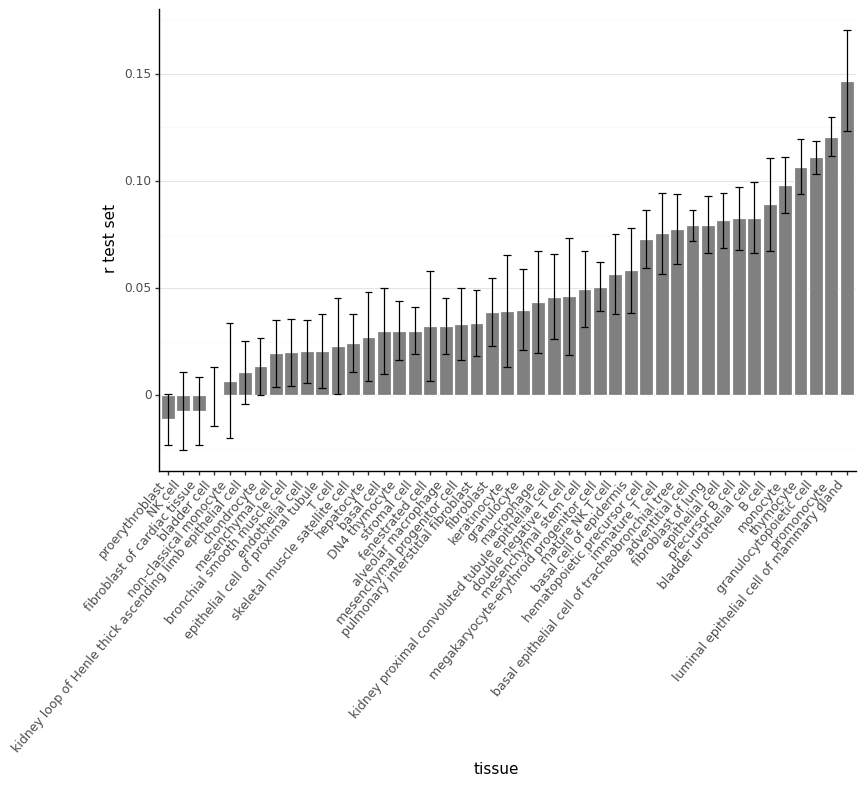

<ggplot: (1447981165065)>

In [22]:
models_df.reset_index(inplace=True)
models_df['tissue'] = pd.Categorical(values=models_df['tissue'].values, 
                                    categories=models_df.sort_values(by='r_test_mean')['tissue'], ordered=True)

(ggplot(models_df, aes('tissue', 'r_test_mean'))
    + geom_col(fill='grey', color='white')
    + geom_errorbar(aes(ymin='r_test_mean-r_test_std', ymax='r_test_mean+r_test_std')) 
    + theme_bw()
    + theme(panel_grid_major_x = element_blank(),
            panel_background = element_blank(),
            axis_line=element_line(), 
            axis_text_x = element_text(angle=50, size=9,hjust = 1), figure_size=(9,6))
    + labs(y='r test set'))

### Computing COMD coefficient

To do it we are going to consider the whole dataset and not divide into sets.

In [23]:
coefs_df, test_preds_df, model_df = uni_var_linreg_tissues(tissues=tissues, train_df=model_data_df, test_df=None, feature='mtdr')

In [24]:
comd_coef_df = coefs_df.copy()
comd_coef_df.rename({'coef':'comd_coef'}, axis=1, inplace=True)

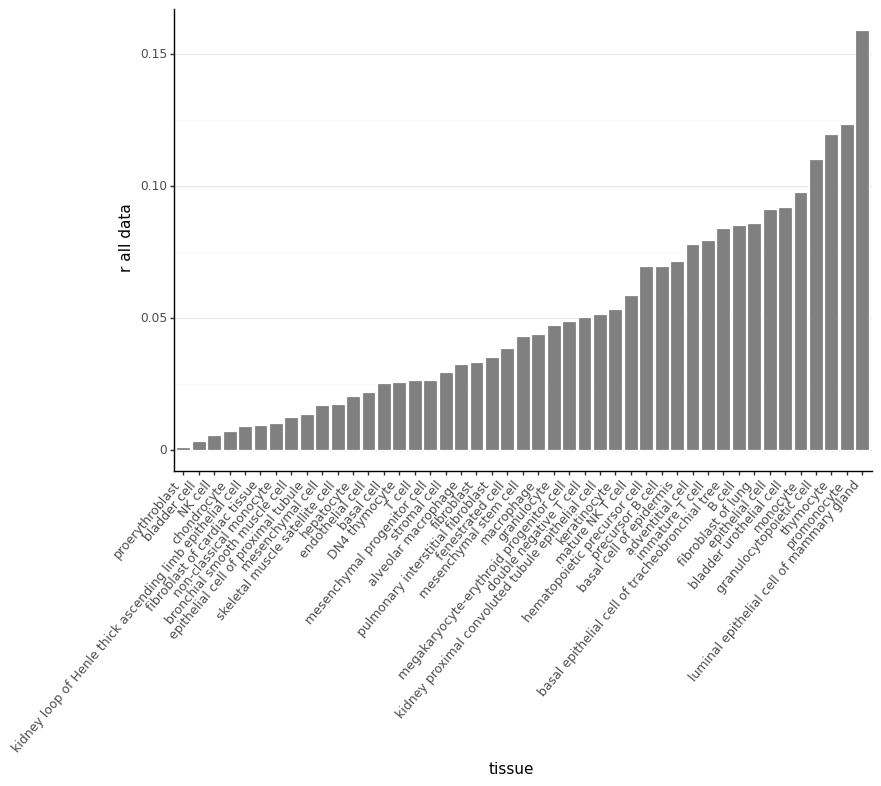

<ggplot: (1447981185841)>

In [25]:
model_df.reset_index(inplace=True)
model_df['tissue'] = pd.Categorical(values=model_df['tissue'].values, 
                                    categories=model_df.sort_values(by='r_test')['tissue'], ordered=True)

(ggplot(model_df, aes('tissue', 'r_test'))
    + geom_col(fill='grey', color='white')
    + theme_bw()
    + theme(panel_grid_major_x = element_blank(),
            panel_background = element_blank(),
            axis_line=element_line(), 
            axis_text_x = element_text(angle=50, size=9,hjust = 1), figure_size=(9,6))
    + labs(y='r all data'))

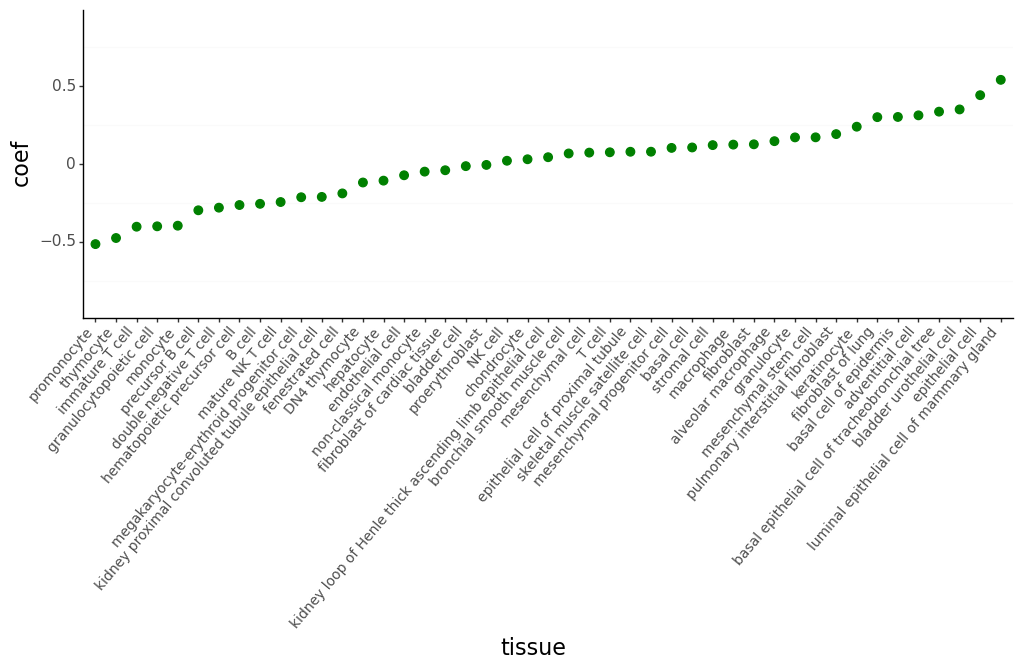

<ggplot: (1447970339273)>

In [26]:
coefs_df['tissue'] = pd.Categorical(values=coefs_df['tissue'].values, categories=coefs_df.sort_values(by='coef')['tissue'], ordered=True)

(ggplot(coefs_df, aes('tissue', 'coef'))
    + geom_point(color='green', size=3)
    + scale_y_continuous(limits=(-0.9,0.9))
    + theme_bw()
    + theme( panel_grid_major = element_blank(), legend_title = element_text(size = 20),
                    #panel_grid_minor = element_blank(),
                    #panel_border = element_blank(),
                    panel_background = element_blank(),
                axis_line=element_line(), 
           axis_text_x = element_text(angle=50, size=10,hjust = 1), figure_size=(12,4), axis_title_x=element_text(size=16), axis_title_y=element_text(size=16),
         axis_text_y = element_text(size=11)))

## Gene set enrichment analysis COMD coefficient vs gene expression

In [27]:
counts_df = pd.read_csv(data_path + 'mouse_gene_expression.csv', sep='\t', index_col=0).drop('gene_id', axis=1)
counts_df

,hepatocyte,endothelial cell,macrophage,mesenchymal stem cell,B cell,skeletal muscle satellite cell,T cell,basal epithelial cell of tracheobronchial tree,mesenchymal progenitor cell,granulocyte,...,hematopoietic precursor cell,precursor B cell,promonocyte,DN4 thymocyte,immature T cell,double negative T cell,thymocyte,bladder urothelial cell,bladder cell,fibroblast of cardiac tissue
Xkr4,0.000000,0.000000,0.000000,0.923317,0.000000,0.000000,0.000000,1.794245,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.426979,0.780815,2.225710
Sox17,0.776099,7.390414,2.511703,3.382882,0.516043,3.112275,1.724861,0.000000,1.126342,0.709272,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mrpl15,4.612178,3.576429,4.367166,3.259667,4.599527,3.435951,4.416400,3.436873,3.335648,3.000792,...,4.742126,4.591163,4.543295,5.196423,5.039173,5.110971,5.269109,3.286285,3.530207,4.392561
Rgs20,0.000000,0.450822,0.000000,1.955933,0.000000,0.000000,0.217305,0.889058,0.941282,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.163428,0.000000,0.000000
Vcpip1,4.722358,4.491869,4.575613,3.718854,4.790605,4.180772,4.532514,4.666393,4.358259,4.251038,...,4.753456,5.210598,5.017280,4.463503,4.882059,4.271681,4.072669,4.810496,4.400125,5.044635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Arhgap6,2.823473,3.192682,3.467450,4.275959,2.524250,3.364317,0.898672,2.007914,4.056965,1.818492,...,4.719074,4.049981,1.609438,0.000000,0.000000,0.000000,0.000000,0.163428,4.395272,5.207961
Mid1,0.000000,0.450822,0.000000,0.321654,0.000000,0.000000,0.794627,0.000000,0.419426,0.000000,...,0.000000,0.000000,0.000000,1.303176,0.000000,0.000000,0.000000,0.303861,0.000000,0.000000
Uty,2.673408,1.347555,1.160682,0.000000,1.882806,0.000000,0.794627,2.976900,2.956892,1.410385,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.831954,2.582255,0.000000
Ddx3y,4.706585,5.232496,4.371790,0.000000,4.280175,0.000000,3.118054,5.785478,6.310331,4.368873,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.768445,5.900026,0.000000


Only select genes whose expression is greater than 0 across all cell types

In [28]:
counts_df = counts_df[counts_df>0].dropna().T

In [29]:
exp_comd_coef_df = comd_coef_df.merge(counts_df, left_on='tissue', right_index=True)
exp_comd_coef_df

,tissue,comd_coef,Mrpl15,Vcpip1,Cops5,Arfgef1,Ncoa2,Tram1,Lactb2,Rpl7,...,Nbdy,Acot9,Rps6ka3,Eif1ax,Bclaf3,Sh3kbp1,Phka2,Rbbp7,Ctps2,Trappc2
37,promonocyte,-0.515069,4.543295,5.017280,5.533390,4.700481,4.219508,6.835185,3.912023,9.052282,...,5.056246,5.774551,4.927254,6.361302,3.555348,5.874931,4.094345,6.240276,5.398163,3.970292
41,thymocyte,-0.475896,5.269109,4.072669,6.125820,4.050332,3.653538,6.615711,3.930489,9.332603,...,4.980917,4.574432,4.705836,6.971463,3.904695,5.874118,2.882570,7.146810,4.944639,3.734172
39,immature T cell,-0.403234,5.039173,4.882059,5.691927,4.376275,3.904408,7.119003,4.108262,9.518363,...,5.753095,5.063116,4.328113,6.556963,3.302496,6.929551,2.980633,5.599473,5.331283,3.545601
34,granulocytopoietic cell,-0.400682,4.701606,4.596289,5.449531,5.086448,3.964431,6.869072,3.554821,8.872663,...,4.000120,4.467636,4.467636,6.409981,4.176450,5.640017,3.423417,6.222621,4.473113,4.205419
33,monocyte,-0.396694,4.271381,5.324821,5.203079,4.994445,3.998208,6.822194,4.055438,9.008286,...,4.919185,5.360642,5.091116,5.740764,3.397531,5.978285,3.649366,4.620854,5.254686,3.621143
36,precursor B cell,-0.297672,4.591163,5.210598,5.057356,4.940369,4.190756,7.324618,4.370552,9.081634,...,4.122843,4.568921,4.876307,5.912814,3.792829,5.801217,3.213260,5.820703,4.342742,3.689969
40,double negative T cell,-0.280863,5.110971,4.271681,5.918546,4.672483,3.873171,7.237269,4.092148,9.342733,...,5.440626,5.667999,4.423836,6.602390,4.271681,6.456421,3.200603,6.447133,5.707869,4.271681
35,hematopoietic precursor cell,-0.263788,4.742126,4.753456,5.407750,5.069555,4.306386,6.602098,3.816080,9.367736,...,5.302887,4.595100,4.818863,6.417562,4.288612,5.738744,3.591248,6.095715,4.870280,3.999526
4,B cell,-0.256144,4.599527,4.790605,5.049861,5.147734,3.880445,6.394504,3.558398,9.450042,...,3.478324,4.461358,4.296400,5.979106,3.954323,6.077910,2.550946,5.884134,4.906997,4.038113
26,mature NK T cell,-0.244576,4.335216,4.818495,5.040021,5.374642,4.619618,6.595905,4.177149,9.329539,...,4.795693,4.039686,5.175001,5.919234,3.618337,6.465830,2.704853,6.012252,4.723992,3.936279


In [30]:
rho_list = []
for gene in counts_df.columns:
    df = exp_comd_coef_df.loc[:, ['comd_coef', gene]].dropna()
    rho_list.append(float(spearmanr(df['comd_coef'], df[gene])[0]))
    
rho_df = pd.DataFrame({'gene': counts_df.columns, 'rho': rho_list}).sort_values('rho', ascending=False)
rho_df

,gene,rho
556,Cstb,0.732279
2275,Tnfrsf12a,0.730698
3431,Lmna,0.714361
500,Fbxo30,0.709091
4553,Anxa4,0.707642
...,...,...
3392,Impa1,-0.706456
147,Hnrnpu,-0.721607
4439,Baz1b,-0.730962
4521,Hnrnpa2b1,-0.743610


In [31]:
rho_df['gene'] = rho_df['gene'].str.upper()

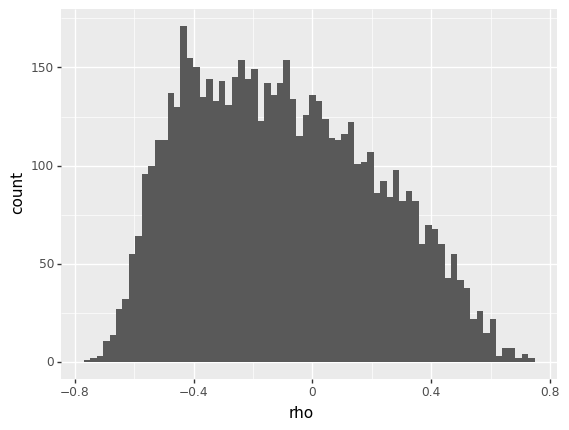

<ggplot: (1447967715213)>

In [32]:
(ggplot(rho_df, aes('rho'))
    + geom_histogram(bins=70))

In [33]:
rho_df.columns = [0,1]
rho_df.reset_index(drop=True,inplace=True)
rho_df

,0,1
0,CSTB,0.732279
1,TNFRSF12A,0.730698
2,LMNA,0.714361
3,FBXO30,0.709091
4,ANXA4,0.707642
...,...,...
6044,IMPA1,-0.706456
6045,HNRNPU,-0.721607
6046,BAZ1B,-0.730962
6047,HNRNPA2B1,-0.743610


In [34]:
import gseapy as gp
pre_res = gp.prerank(rnk=rho_df, gene_sets='GO_Biological_Process_2018',
                     processes=40,
                     permutation_num=5000, 
                     outdir='gsea_results/mouse', format='svg', seed=123)

/opt/modules/i12g/anaconda/envs/mrna_halflife2/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: processes is deprecated; use threads
2023-02-21 16:01:06,576 Duplicated values found in preranked stats: 27.74% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [35]:
pre_res.res2d.drop('Name', axis=1).set_index('Term').to_csv(data_path + 'gsea_tabula_muris_comd_coef_results.csv')

In [37]:
from gseapy.plot import gseaplot

term = 'mitochondrial ATP synthesis coupled electron transport (GO:0042775)'
gseaplot(rank_metric=pre_res.ranking, term=term, 
         **pre_res.results[term], figsize=(4.2,4.8), cmap='RdBu', ofname='../../figures/plots/fig2/mito_atp_syn_gsea_mouse.svg')

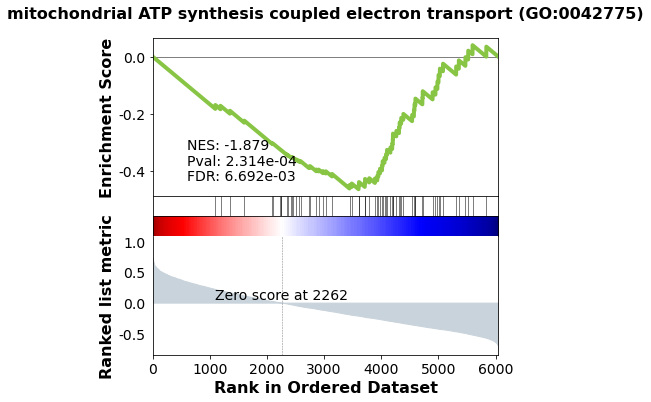

In [38]:
from gseapy.plot import gseaplot

term = 'mitochondrial ATP synthesis coupled electron transport (GO:0042775)'
gseaplot(rank_metric=pre_res.ranking, term=term, 
         **pre_res.results[term])

In [39]:
exp_comd_coef_df.to_csv('../../figures/figure_data/fig2/exp_comd_coef_mouse.csv')

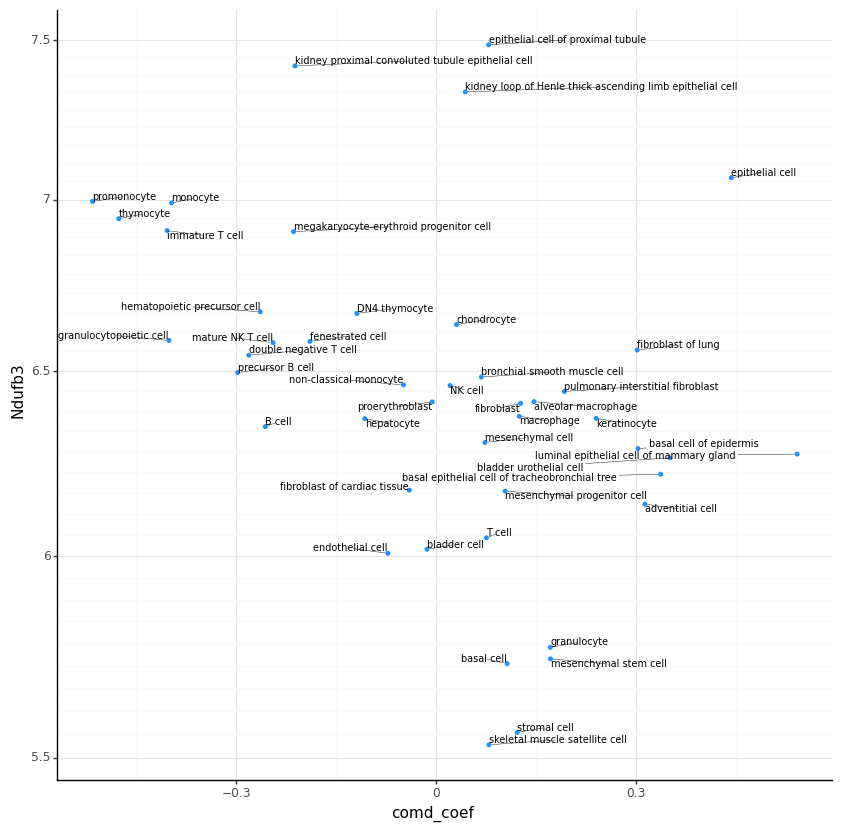

<ggplot: (1447966758653)>

In [40]:
adjust_text_dict = {
    'expand_points': (0, 0),
    'arrowprops': {
        'arrowstyle': '-',
        'color': 'k',
        'lw':0.3
    }
}
gene='Ndufb3'
(ggplot(exp_comd_coef_df, aes('comd_coef', gene, label='tissue'))
    + geom_point(size=1, color="dodgerblue")
    + theme_bw()
    + theme(figure_size=(10, 10), axis_line=element_line(),#panel_grid_major = element_blank(),
                    #panel_grid_minor = element_blank(),
                    #panel_border = element_blank(),
                    panel_background = element_blank())
    + scale_y_log10()
    + geom_text(aes(label='tissue'), adjust_text = adjust_text_dict, size=7)
    + labs( y=gene))